# Stimuli

## Our Stimuli
* 0: control
* 1: pinch
* 2: new_stroke (after december)
* 3: ballon
* 4: AG (ano-genital brush)
* 5: AD (anal distension)
* 6: heating
* 7: mock
* 8: old_stoke (first experiments with stroke)
* 9: anal pinch
* 10: mock with poop
* 11: vaginal distansion
* 12: tomatoe
* 13: poop
* 14: Bladder
* 15: Colon-rectum distension (CRD)
* 16: AD + CFA (anal distension + inflamation)
* 17: AGB + CFA (ano-genital brush + inflamation)
* 18: Heating + CFA (heating + inflamation)
* 19: Tail Brush
* 20: TRPM8 td Tomato
* 21: AD + Pulse
* 22: AGB-CFA 1 W
* 23: AD-CFA 1W
* 24: HP
* 25: Penis
* 26: Clitoris Vibration
* 27: Max Cells
* 28: Tracing Ano Genital Skin injection
* 29: Crazy Mock
* 30: Tracing Anal injection
* 31: Tracing Vagina


In [1]:
import numpy as np
import pandas as pd
import scanpy as sc
import scipy
import anndata as ad
import hdf5plugin
from sklearn.decomposition import TruncatedSVD
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import rcParams
import os 
#external modules
#pretty plotting
import seaborn as sb
import sys 
import warnings
import config as general_paths
warnings.filterwarnings("ignore")
sb.set_context(context='poster')

import copy

sc.settings.verbosity = 3             # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.logging.print_header()
sc.settings.set_figure_params(dpi=80)

scanpy==1.9.8 anndata==0.9.2 umap==0.5.5 numpy==1.24.4 scipy==1.10.1 pandas==1.5.3 scikit-learn==1.1.3 statsmodels==0.14.1 igraph==0.10.8 louvain==0.8.1 pynndescent==0.5.11


In [2]:
NO_PCA = 20
SELECTED_LOUVAIN = "louvain_r1"

## SECTION I: Data loading
Loading adata information that has been agregated and quality controled

In [3]:
figure_path = general_paths.figures_path
data_path = general_paths.data_path
output_path = general_paths.output_path
local_path = general_paths.local_path
input_path = output_path

In [4]:
# read the files
adata_path = os.path.join(input_path,'campari_umap_from_kallisto.h5ad')
adata = ad.read_h5ad(adata_path)

In [5]:
adata

AnnData object with n_obs × n_vars = 2126 × 16000
    obs: 'sample', 'stimulus', 'red', 'green', 'well_id', 'plate_number', 'batch', 'stimulus_name', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'n_counts', 'n_genes', 'to_exclude', 'plate_str', 'louvain_r0.5', 'louvain_r1', 'louvain_r1.5', 'louvain_r2', 'louvain_r2.5'
    var: 'gene_id', 'gene_name', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'hvg', 'log1p', 'louvain', 'louvain_r0.5_colors', 'louvain_r1.5_colors', 'louvain_r1_colors', 'louvain_r2.5_colors', 'louvain_r2_colors', 'neighbors', 'pca', 'plate_str_colors', 'sample_colors', 'stimulus_name_colors', 'umap'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'connectivities', 'distances'

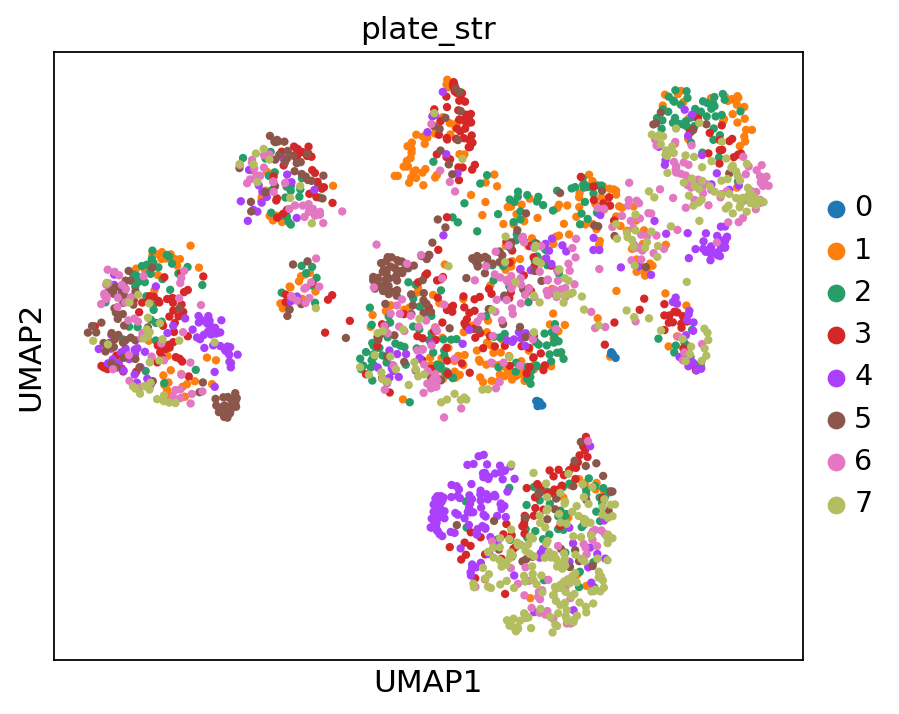

In [6]:
rcParams['figure.figsize']=(6,5)
# check for batch effect
sc.pl.umap(adata, color ="plate_str")
# sc.pl.umap(adata_umap_no_doublets)

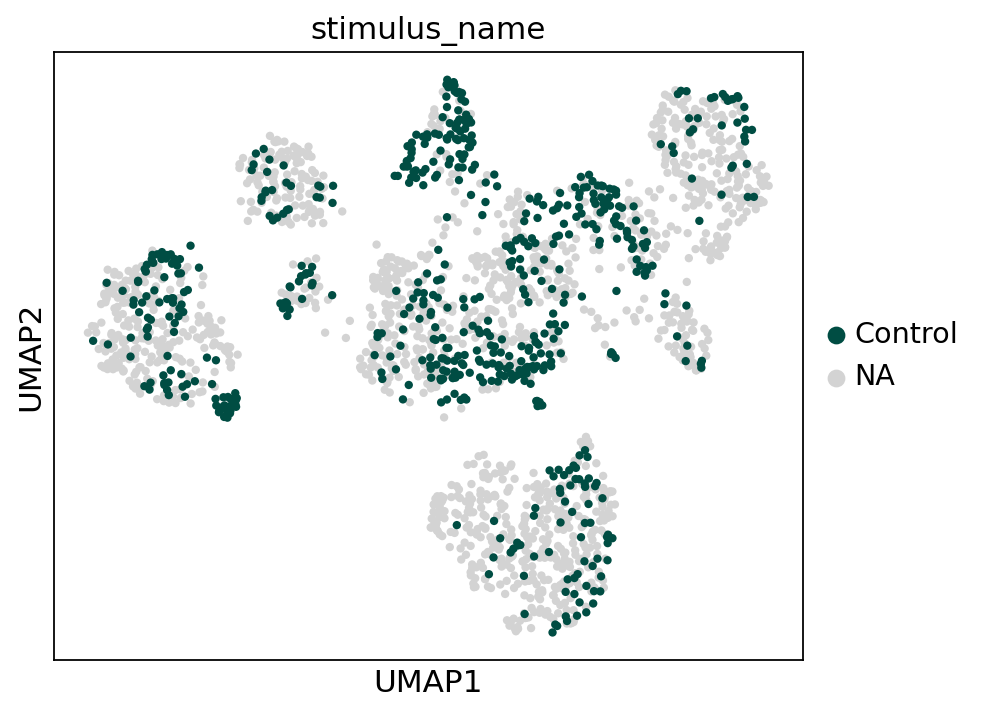

In [7]:

sc.pl.umap(adata, color ="stimulus_name", groups=["Control"])

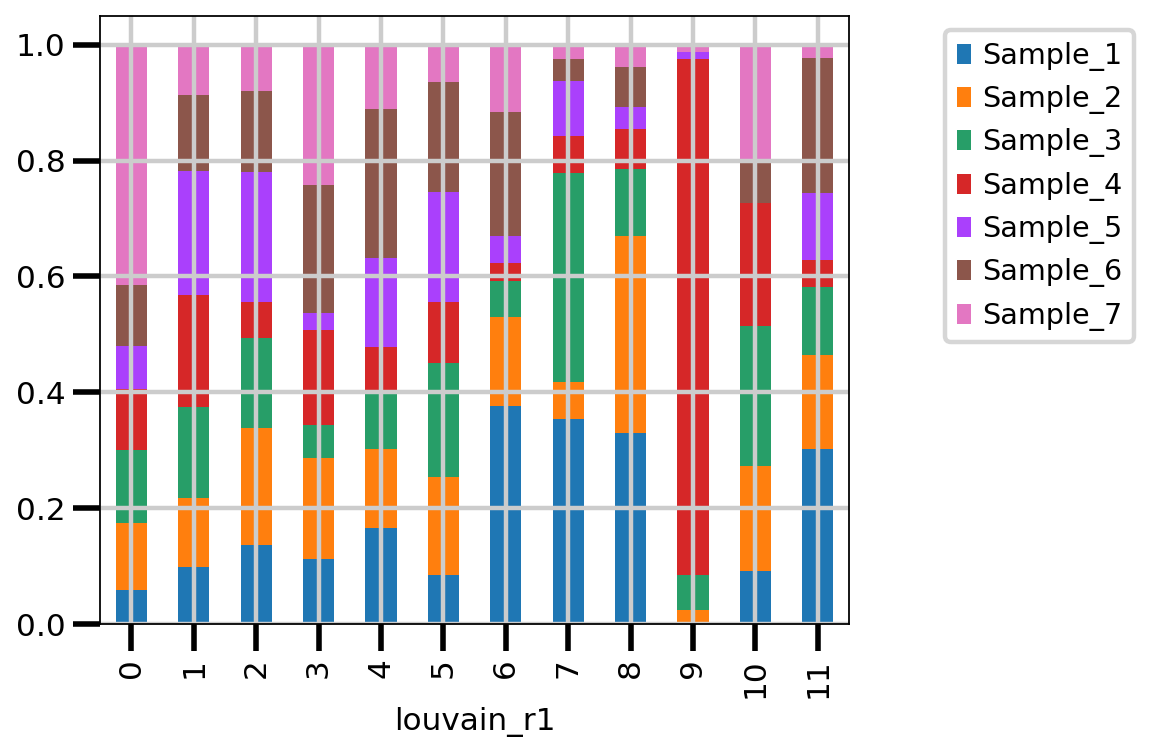

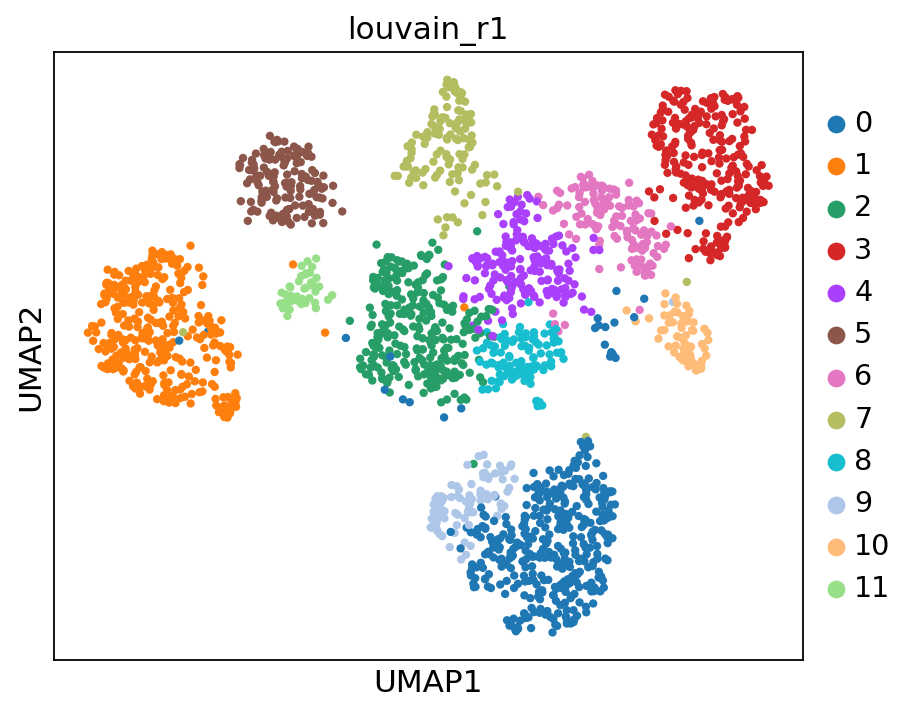

In [8]:
# show which cluster has what proportions of cells from which plate
tmp = pd.crosstab(adata.obs[SELECTED_LOUVAIN],adata.obs['sample'], normalize='index')
tmp.plot.bar(stacked=True).legend(bbox_to_anchor=(1.4, 1),loc='upper right')
# show louvain clusters
sc.pl.umap(adata, color=[SELECTED_LOUVAIN], use_raw=False)

In [12]:
# Interesting stimuli (numbers)
stimuli_agb = [4,17,22]
stimuli_ad = [5,16,23]

# stimuli to look deeper into
stimuli2show = stimuli_ad

In [10]:
np.unique(adata.obs['stimulus_name'])

array(['AD', 'AD + Pulse', 'AD+CFA', 'AD+CFA 1W', 'AG', 'AGB+CFA',
       'AGB+CFA 1 W', 'Anal_pinch', 'Ballon', 'Bladder', 'CRD',
       'Clitoris Vibration', 'Control', 'Crazy Mock', 'HP', 'Heating',
       'Heating+CFA', 'Max Cells', 'Mock', 'Mock_w_poop', 'New_stroke',
       'Old_stroke', 'Penis', 'Pinch', 'Poop', 'TRPM8 td tomato',
       'Tail Brush', 'Tomato', 'Tracing Anal injection',
       'Tracing Ano Genital Skin injection', 'Tracing Vagina',
       'Vaginal_distension'], dtype=object)

In [42]:
# # find all stimuli on plate 4
# # find all stimuli I want to look at trajectory
# adata_umap_no_doublets = adata_umap_no_doublets[np.where((adata_umap_no_doublets.obs['stimulus_name'] =="AG" ) |
#                                                           (adata_umap_no_doublets.obs['stimulus_name'] =="AGB+CFA") | 
#                                                           (adata_umap_no_doublets.obs['stimulus_name'] =="AGB+CFA 1 W"))]

In [43]:
# np.unique(adata_umap_no_doublets.obs['stimulus_name'])

In [44]:

# sc.pl.umap(adata_umap_no_doublets, color ="stimulus_name", use_raw=False)
# sc.pl.umap(adata_umap_no_doublets)

In [13]:

labels=['Control','Pinch','New_stroke','Ballon','AG','AD','Heating','Mock','Old_stroke','Anal_pinch','Mock_w_poop','Vaginal_distension','Tomatoe','Poop', 
        'Bladder','CRD','AD+CFA','AGB+CFA','Heating+CFA','Tail Brush','TRPM8 td tomato',
        'AD + Pulse', 'AGB+CFA 1 W','AD+CFA 1W','HP','Penis','Clitoris Vibration','Max Cells',
        'Tracing Ano Genital Skin injection','Crazy Mock','Tracing Anal injection', 'Tracing Vagina']



In [14]:
### transform adata sparse matrix to scipy
x = adata.X
### create arrays with information about stimuli
stim = np.zeros((x.shape[0],))
plate_numbers = np.zeros((x.shape[0],))

for i in range(x.shape[0]):
    stim[i] = adata.obs['stimulus'][i]
    plate_numbers[i] = adata.obs['plate_number'][i]



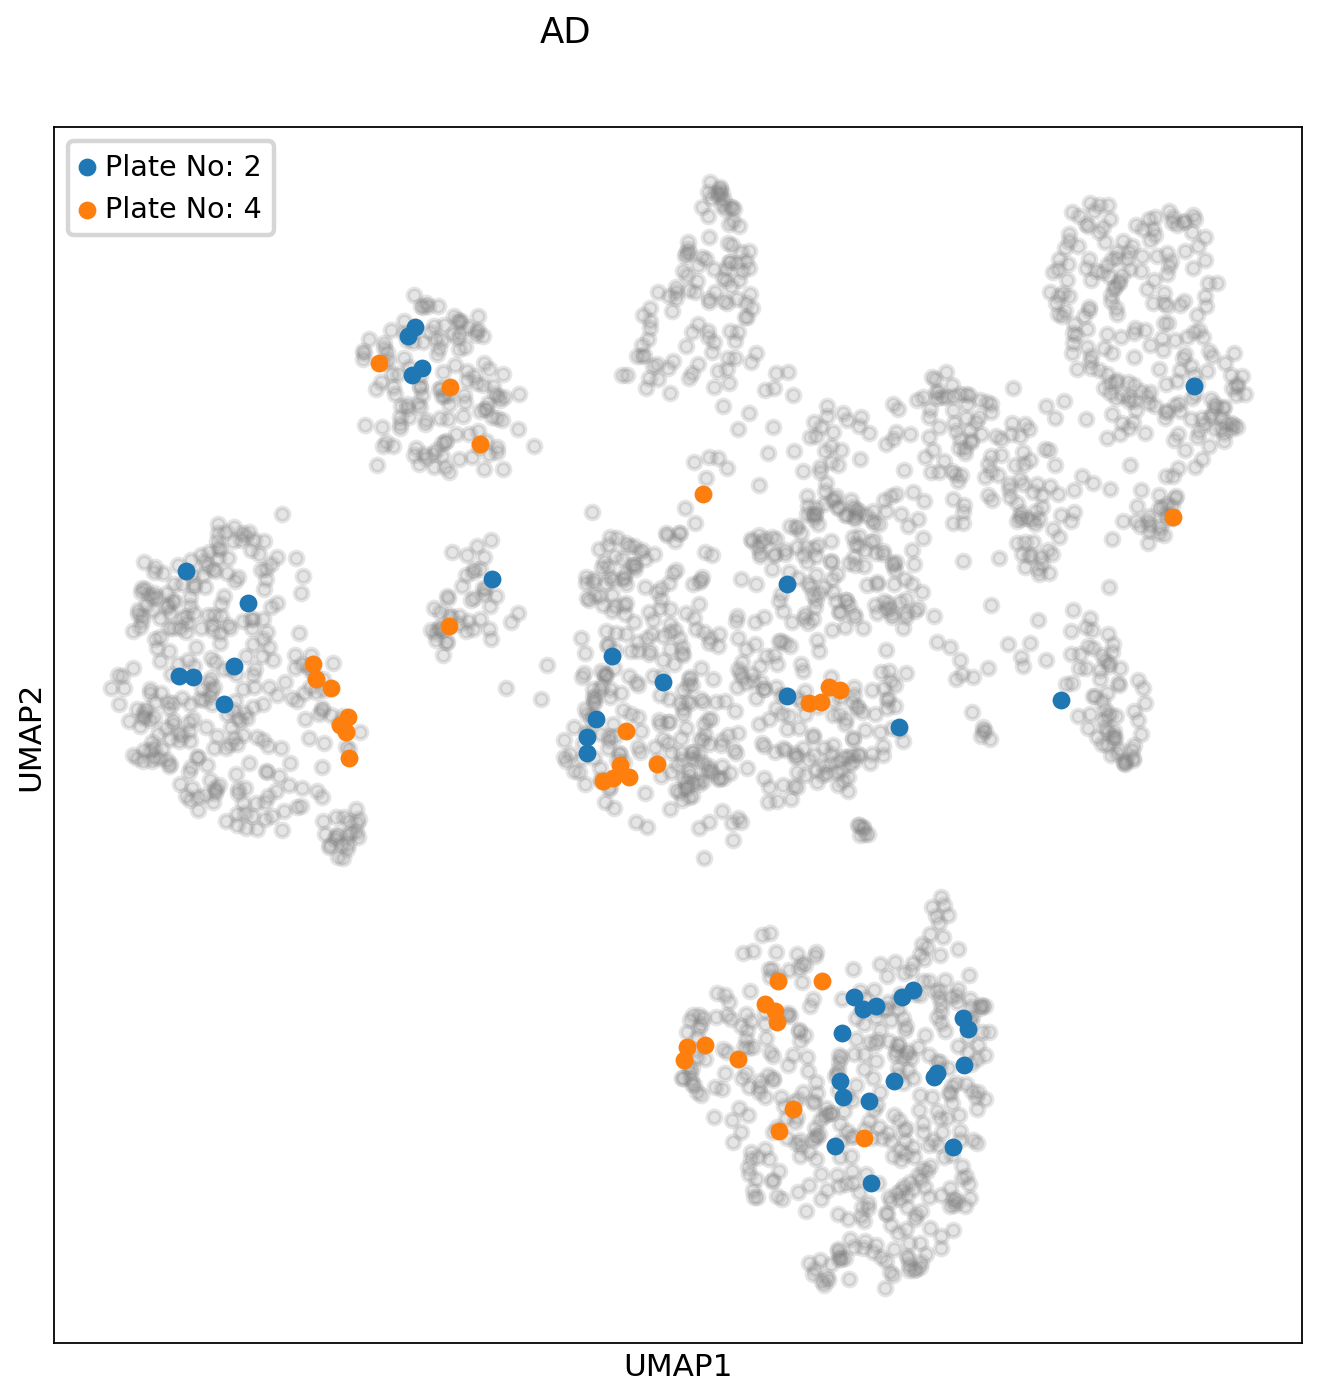

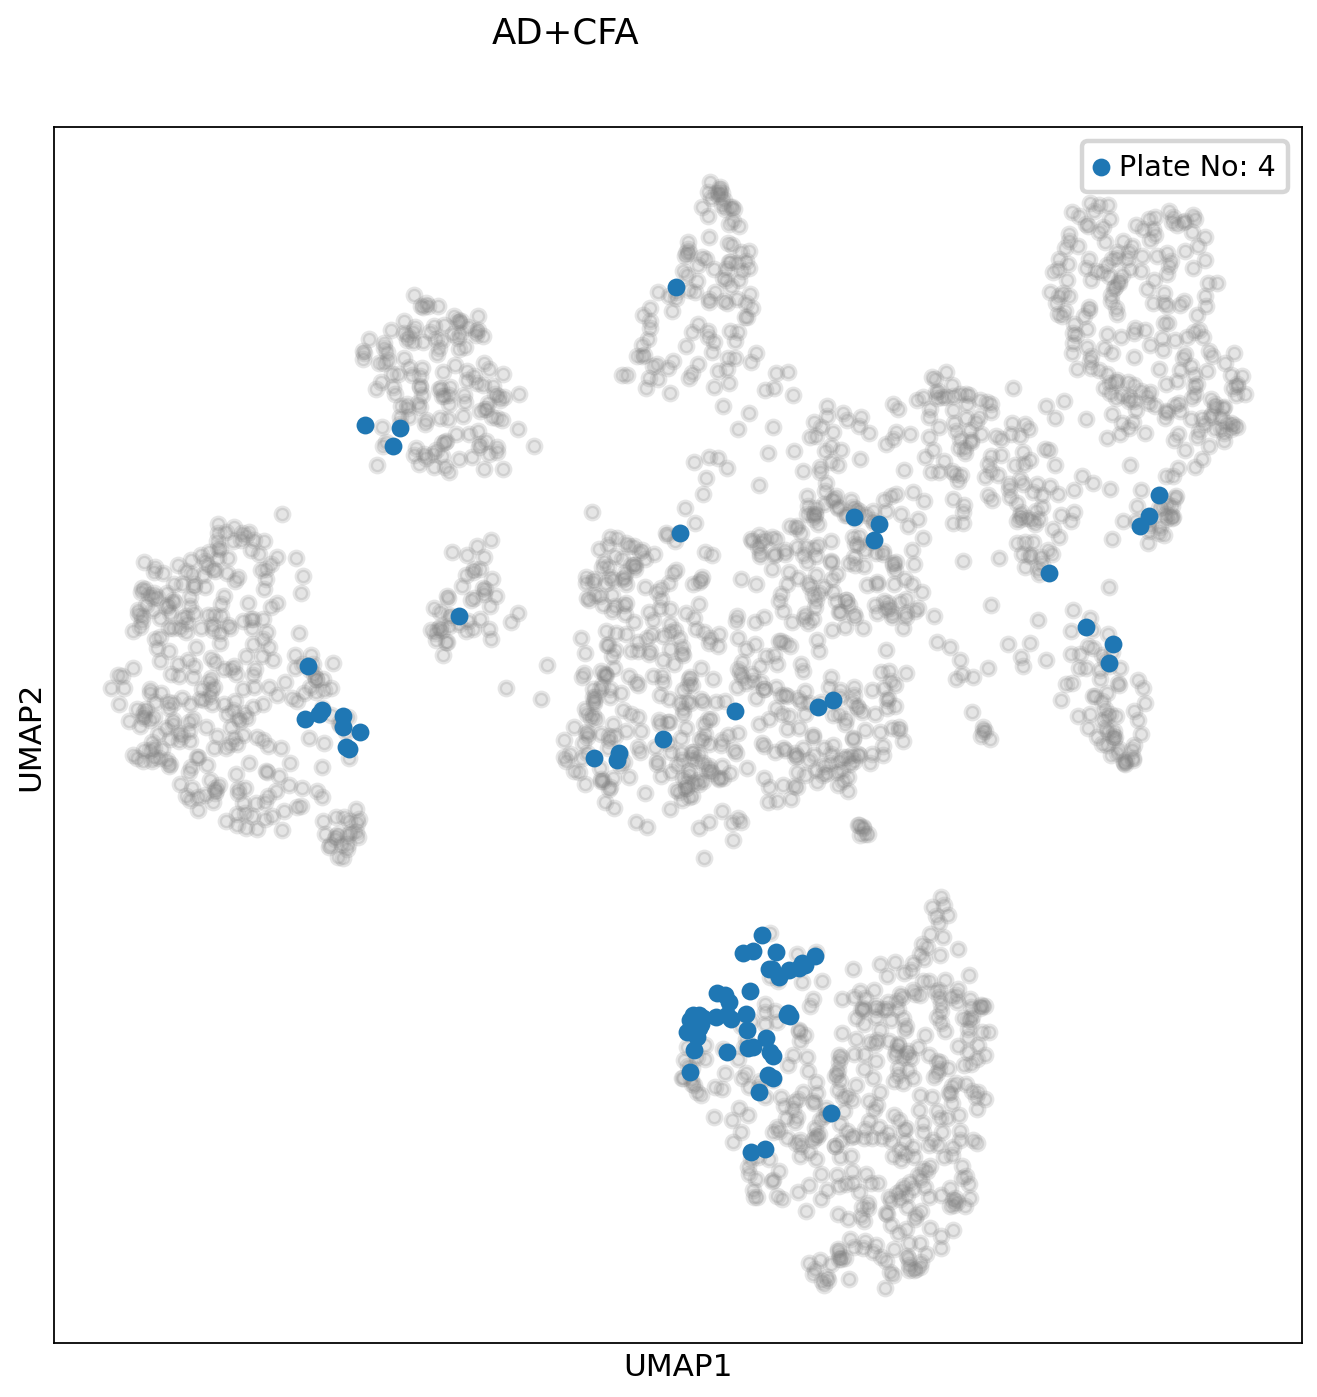

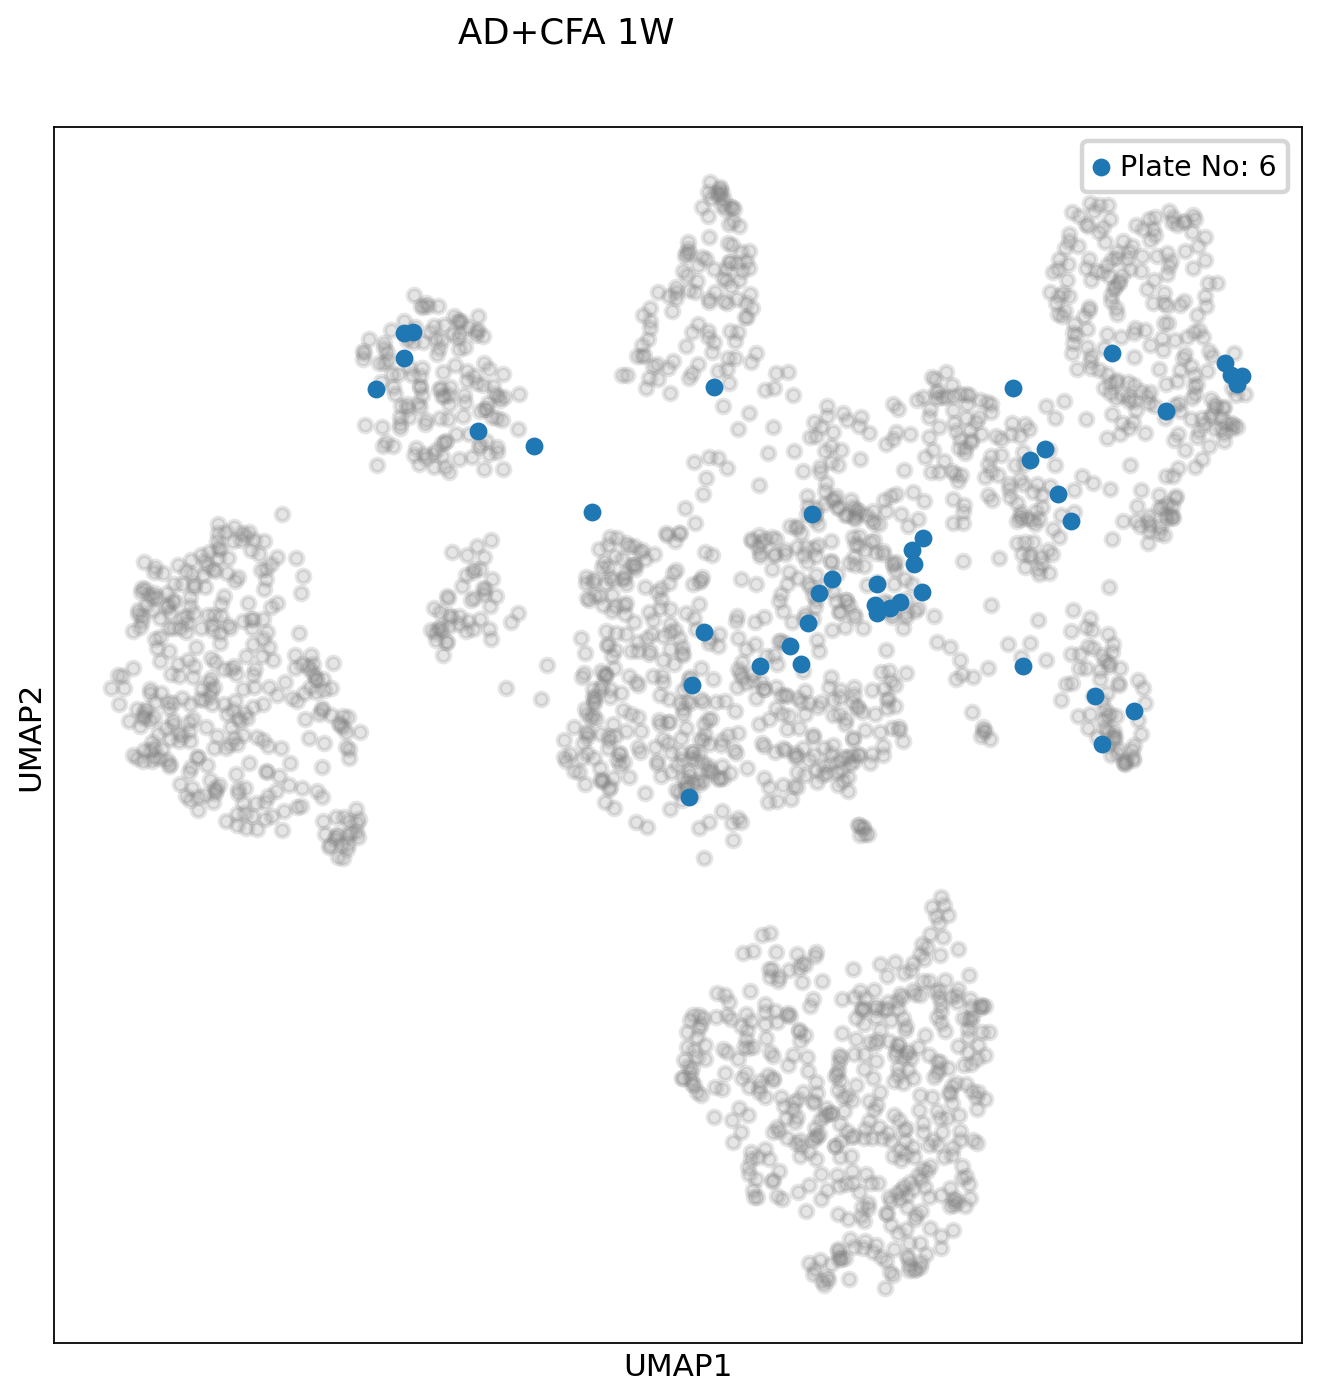

In [15]:
rcParams['figure.figsize']=(4,4)
# show each stimulus separately, distinguish between each sample(plate)
unique_wells = list(set(plate_numbers))
for i in range(0,len(labels)):
    if i in stimuli2show:
        figure, axes = plt.subplots()
        axes.scatter(adata.obsm['X_umap'][:,0],adata.obsm['X_umap'][:,1],c='gray',alpha=0.2)
        # unique_wells = list(set(plate_numbers))
        stim_index = np.where(stim == i)[0]
        for well in unique_wells: # show different wells differently
            well_index = np.where(plate_numbers == well)[0]
            # select only common indexes
            index = list(set(stim_index).intersection(well_index))
            if len(index) > 0:
                # print(f"{labels[i]}: well: {well}")
                axes.scatter(adata.obsm['X_umap'][index,0],adata.obsm['X_umap'][index,1],label="Plate No: "+str(int(well)))
        axes.grid(False)
        axes.legend()
        figure.set_size_inches([10,10])
        figure.suptitle(labels[i], fontsize=16)
        # Hide X and Y axes tick marks
        axes.set_xticks([])
        axes.set_yticks([])
        axes.set_xlabel('UMAP1')
        axes.set_ylabel('UMAP2')
        # figure.savefig(os.path.join(figure_path, 'stimulus_'+labels[i]+'.png'))

Text(0, 0.5, 'UMAP2')

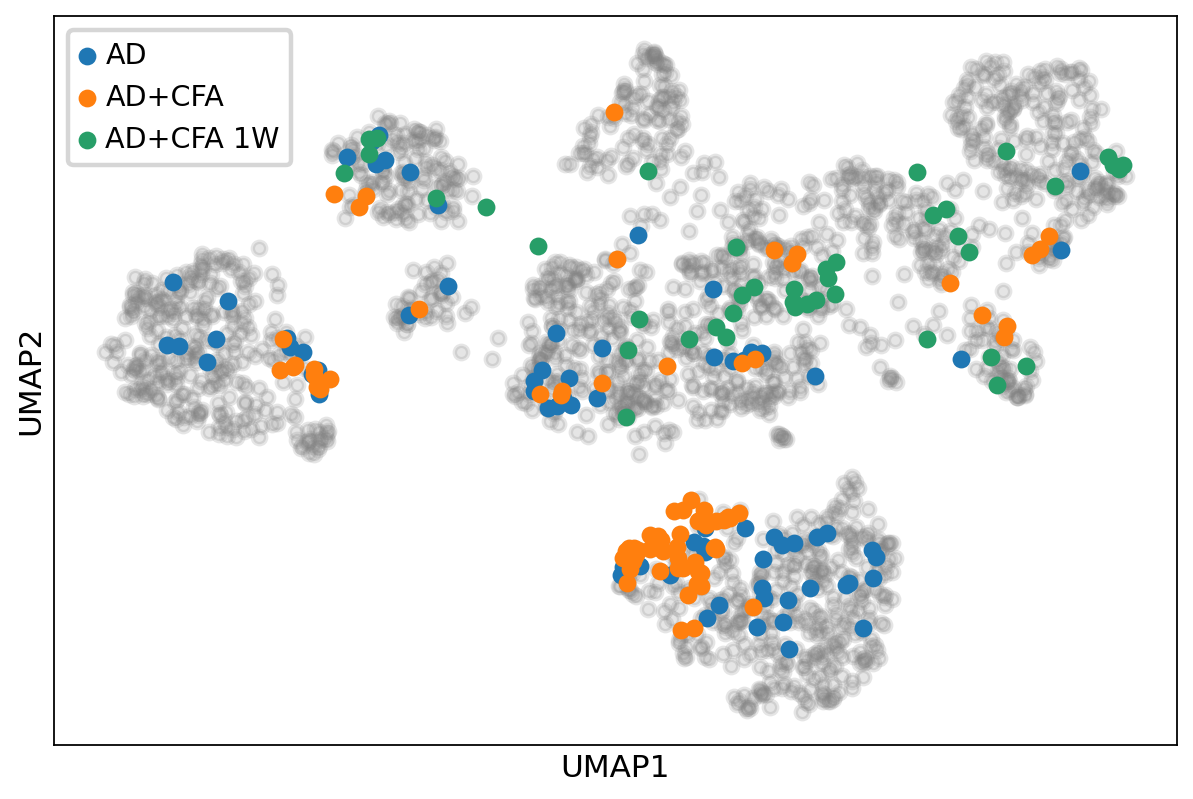

In [16]:
# show each stimulus separately
figure, axes = plt.subplots()
axes.scatter(adata.obsm['X_umap'][:,0],adata.obsm['X_umap'][:,1],c='gray',alpha=0.2)
for i in range(0,len(labels)):
    if i in stimuli2show:
        stim_index = np.where(stim == i)[0]
        
        axes.scatter(adata.obsm['X_umap'][stim_index,0],adata.obsm['X_umap'][stim_index,1],label = labels[i])
axes.grid(False)
axes.legend()
figure.set_size_inches([9,6])
# figure.suptitle("AD", fontsize=16)
# Hide X and Y axes tick marks
axes.set_xticks([])
axes.set_yticks([])
axes.set_xlabel('UMAP1')
axes.set_ylabel('UMAP2')

In [49]:
# # oneliner plot
# sc.pl.umap(adata_umap_no_doublets, color=['stimulus_name'], groups=['AD','AD+CFA','AD+CFA 1W'], use_raw=False)

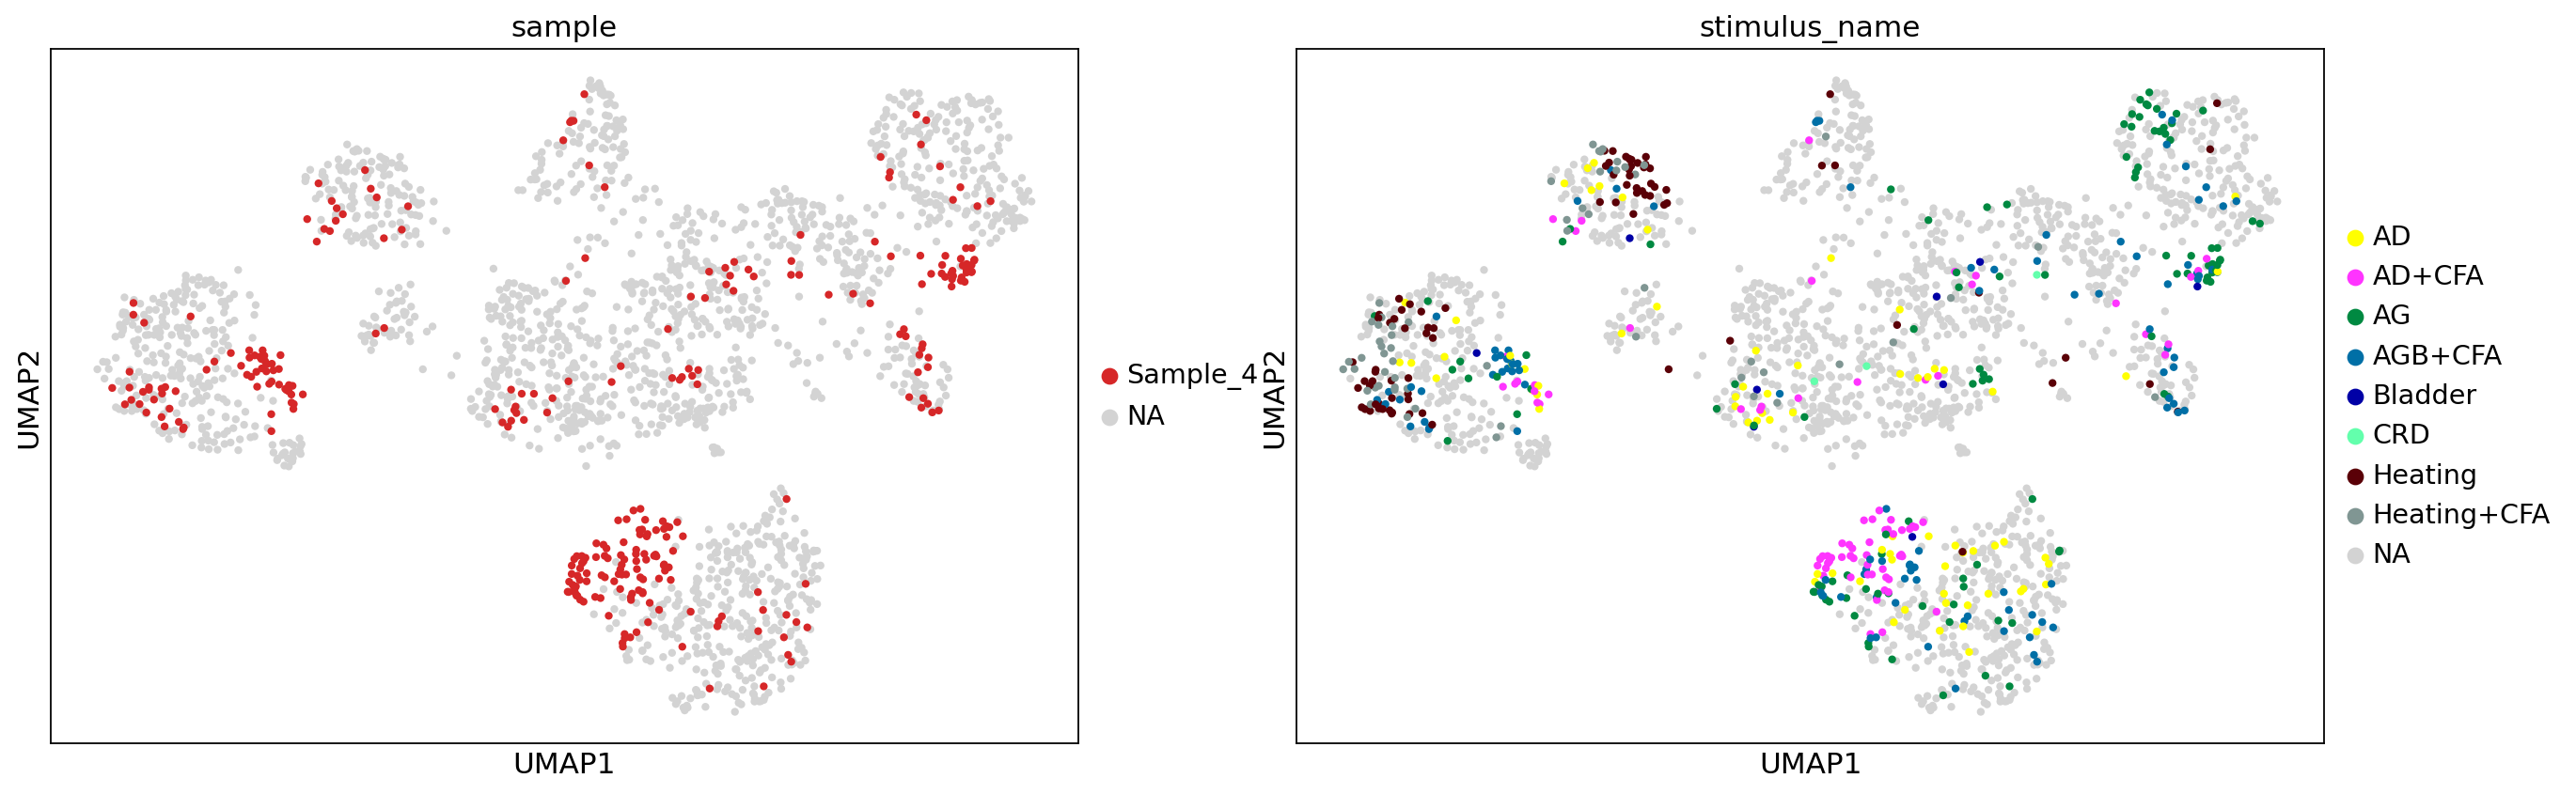

In [17]:
# plot only 4th sample and stimuli from that sample
rcParams['figure.figsize']=(9,6)
sc.pl.umap(adata, color=['sample','stimulus_name'], groups=['Sample_4','AG','AD','Heating','Bladder','CRD','AD+CFA','AGB+CFA','Heating+CFA'], use_raw=False)

## PAGA

drawing single-cell graph using layout 'fa'
    finished: added
    'X_draw_graph_fr', graph_drawing coordinates (adata.obsm) (0:00:00)


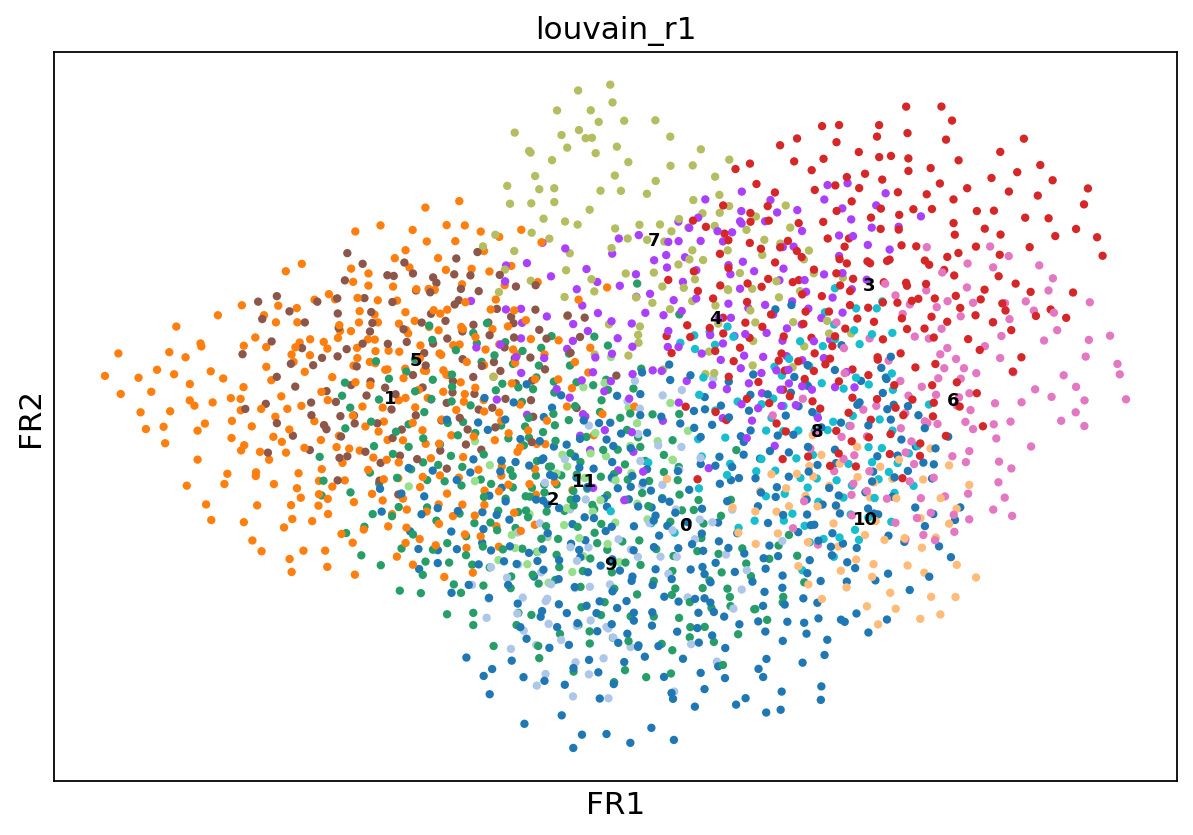

running PAGA
    finished: added
    'paga/connectivities', connectivities adjacency (adata.uns)
    'paga/connectivities_tree', connectivities subtree (adata.uns) (0:00:00)
--> added 'pos', the PAGA positions (adata.uns['paga'])


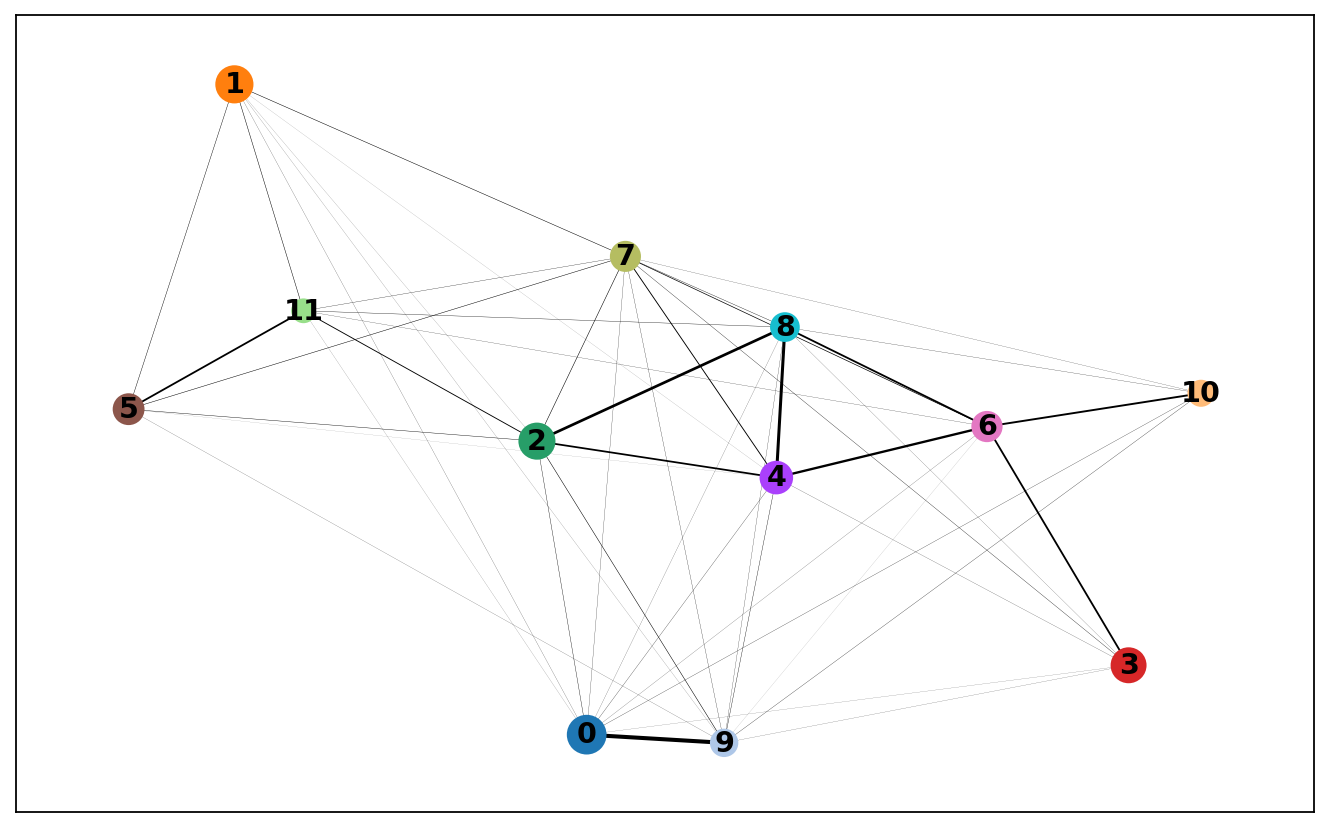

In [19]:
# use the umap to initialize the graph layout.
sc.tl.draw_graph(adata, init_pos='X_umap')
sc.pl.draw_graph(adata, color=SELECTED_LOUVAIN, legend_loc='on data', legend_fontsize = 'xx-small')
sc.tl.paga(adata, groups=SELECTED_LOUVAIN)
sc.pl.paga(adata, color=SELECTED_LOUVAIN, edge_width_scale = 0.3)

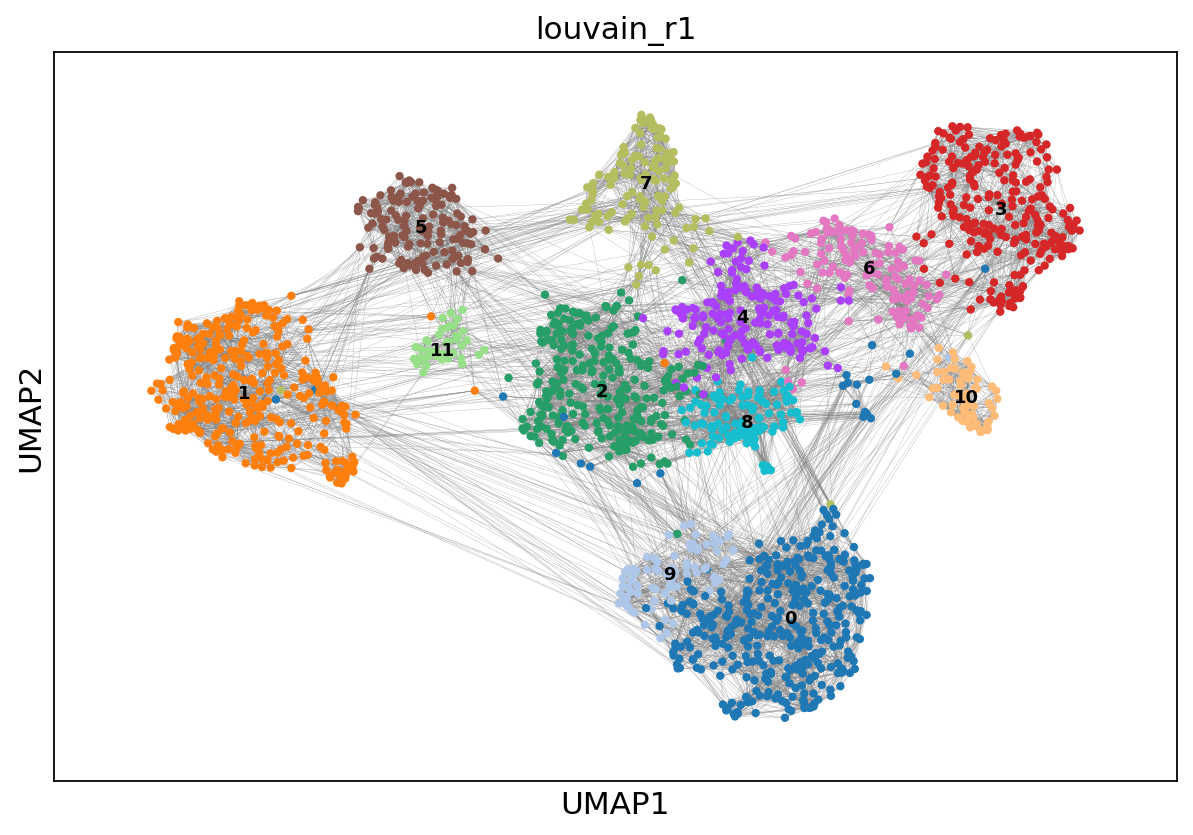

In [20]:
rcParams['figure.figsize']=(9,6)
sc.pl.umap(adata, color = [SELECTED_LOUVAIN],legend_loc = 'on data', legend_fontsize = 'xx-small', edges = True)

computing neighbors
    using 'X_pca' with n_pcs = 20
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:01)


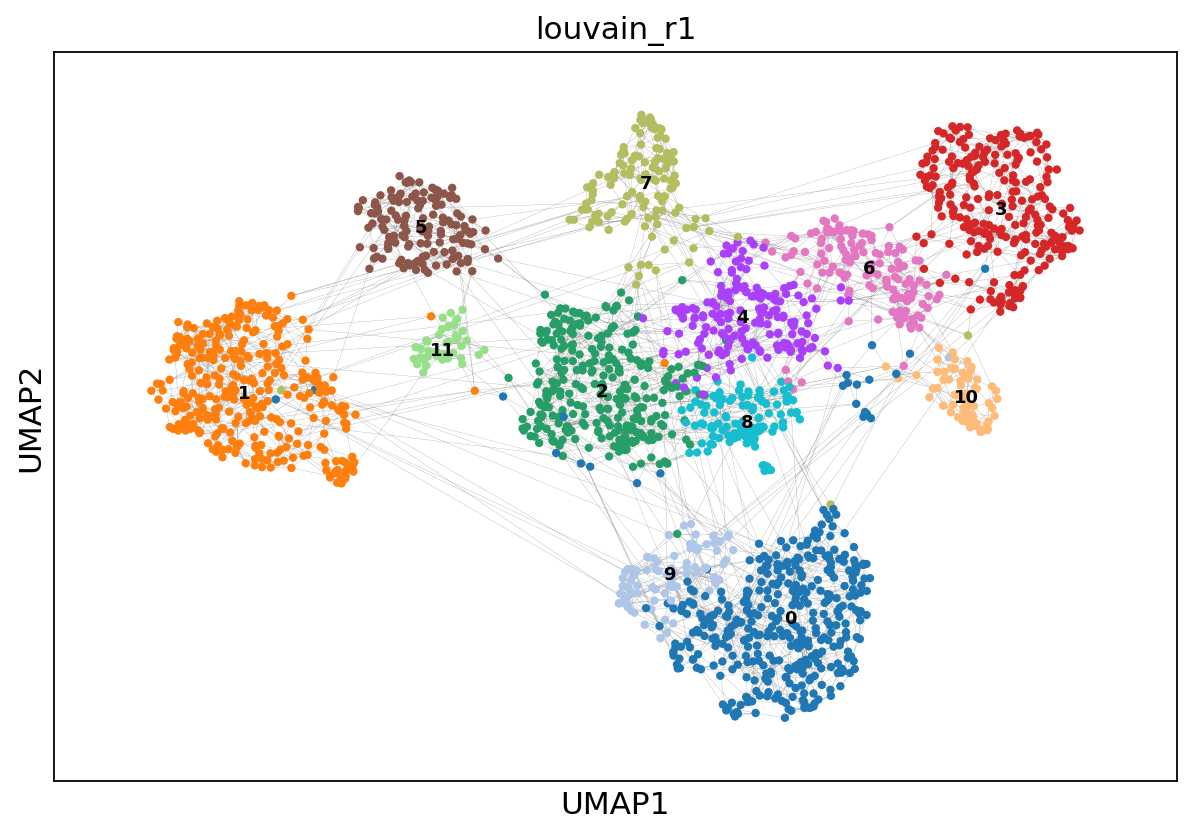

In [21]:
# fewer neighbors
sc.pp.neighbors(adata, n_neighbors=5, n_pcs = NO_PCA)
sc.pl.umap(adata, edges=True, color = SELECTED_LOUVAIN, legend_loc= 'on data', legend_fontsize= 'xx-small')

drawing single-cell graph using layout 'fa'
    finished: added
    'X_draw_graph_fr', graph_drawing coordinates (adata.obsm) (0:00:00)


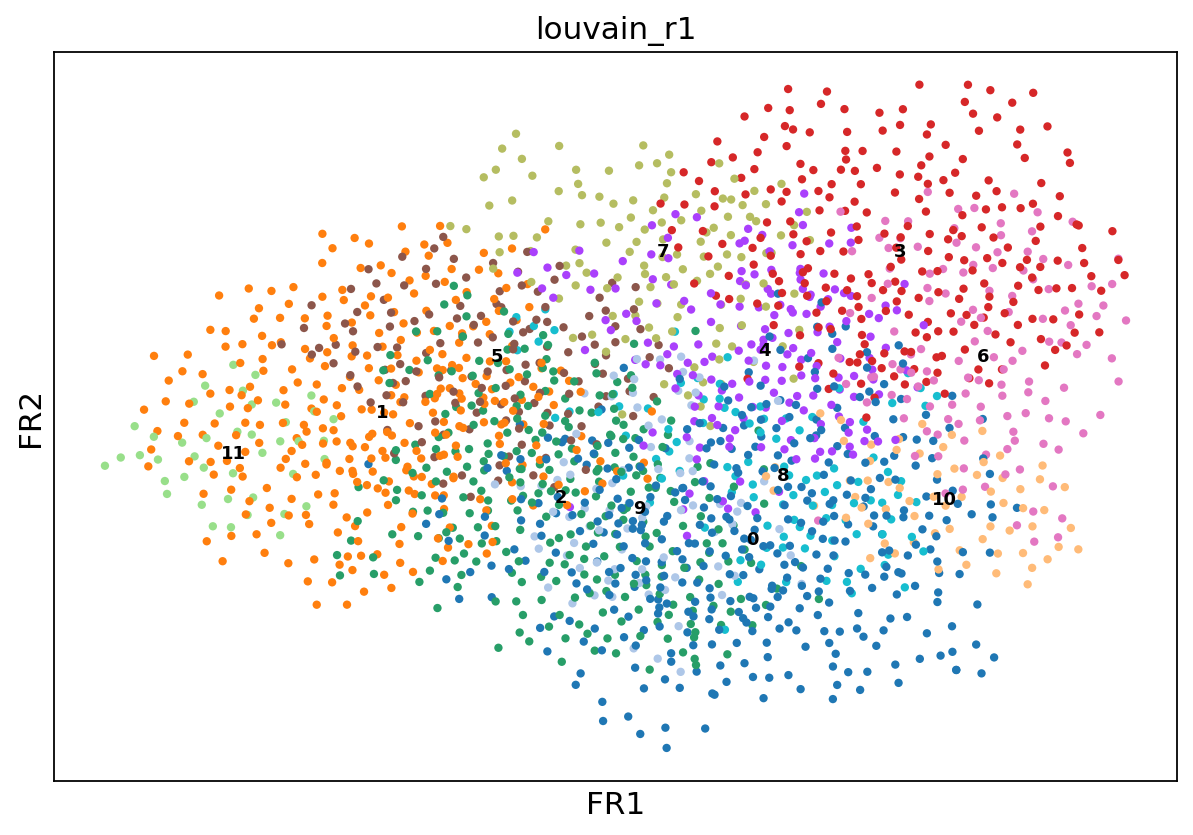

In [22]:
# rerun PAGA
sc.tl.draw_graph(adata, init_pos='X_umap')
sc.pl.draw_graph(adata, color=SELECTED_LOUVAIN, legend_loc='on data', legend_fontsize = 'xx-small')

running PAGA


    finished: added
    'paga/connectivities', connectivities adjacency (adata.uns)
    'paga/connectivities_tree', connectivities subtree (adata.uns) (0:00:00)
--> added 'pos', the PAGA positions (adata.uns['paga'])


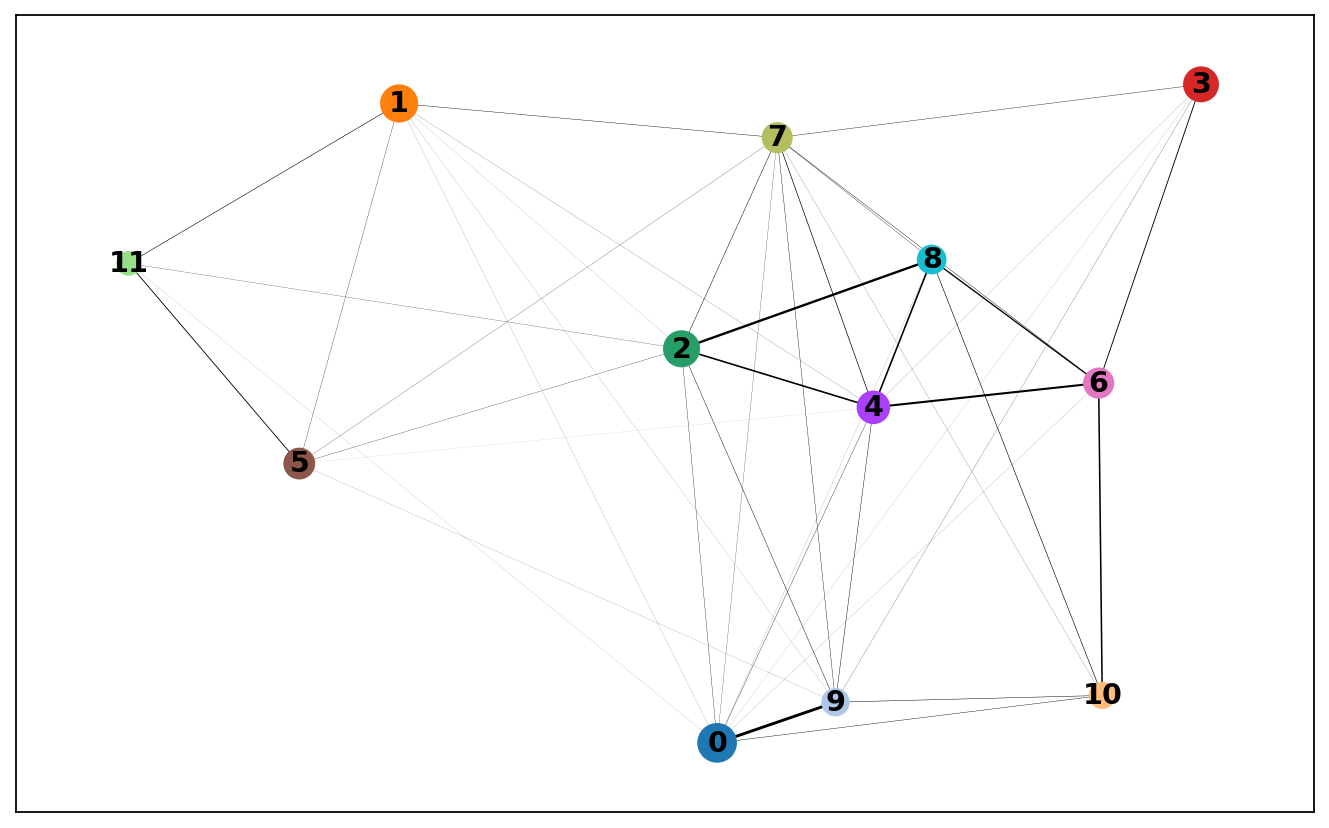

In [23]:
sc.tl.paga(adata, groups=SELECTED_LOUVAIN)
sc.pl.paga(adata, color=SELECTED_LOUVAIN, edge_width_scale = 0.3)

In [24]:
# We can now redraw the graph using another starting position from the paga layout. The following is just as well possible for a UMAP.
sc.tl.draw_graph(adata, init_pos='paga')

drawing single-cell graph using layout 'fa'
    finished: added
    'X_draw_graph_fr', graph_drawing coordinates (adata.obsm) (0:00:01)


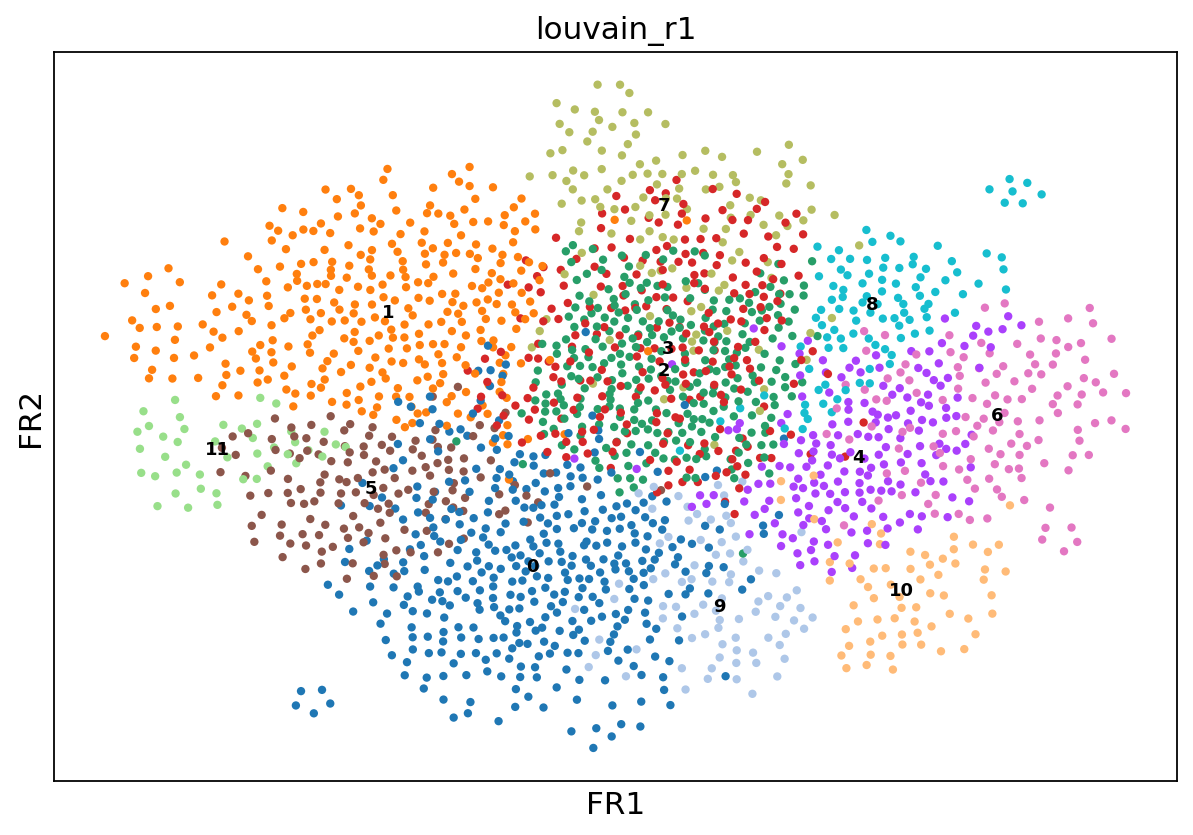

In [25]:
sc.pl.draw_graph(adata, color=[SELECTED_LOUVAIN], legend_loc='on data', legend_fontsize=  'xx-small')

--> added 'pos', the PAGA positions (adata.uns['paga'])


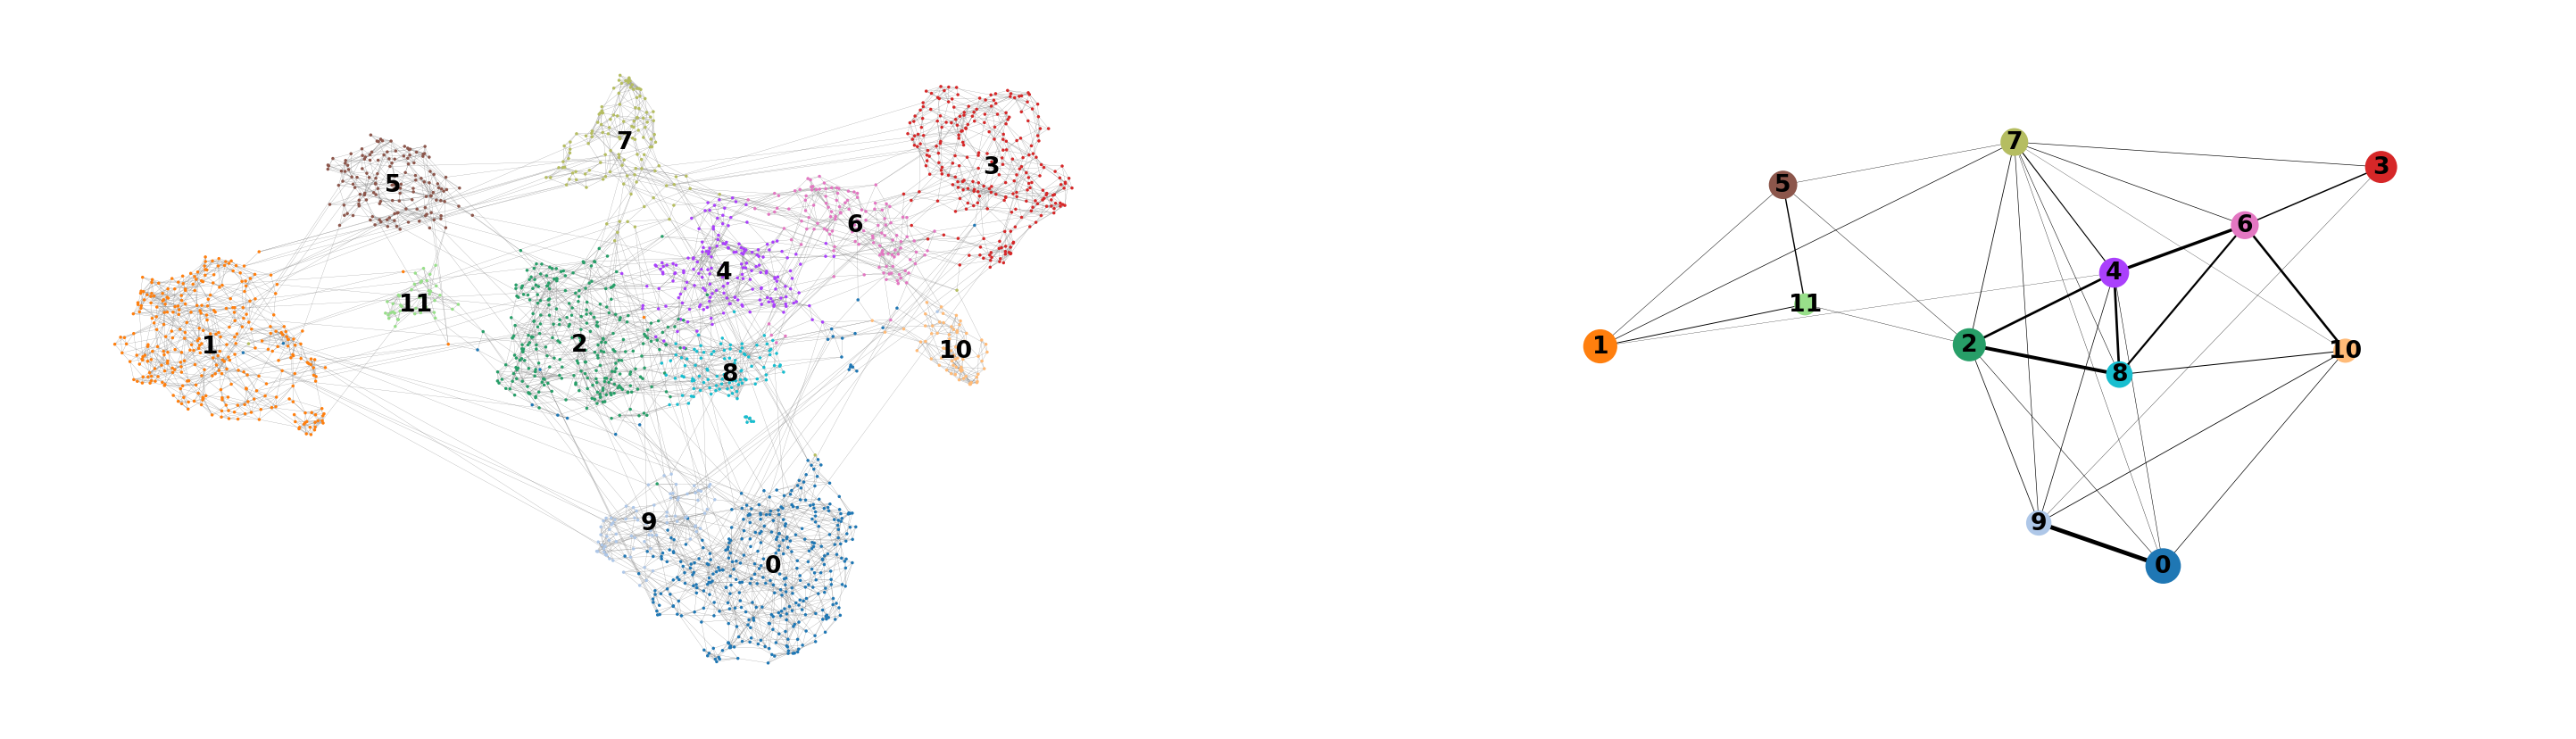

In [26]:
sc.pl.paga_compare(
    adata, threshold=0.03, title='', right_margin=0.2, size=10, edge_width_scale=0.5,
    legend_fontsize=12, fontsize=12, frameon=False, edges=True)

In [27]:
# Choose a root cell for diffusion pseudotime. 
# cluster 0 a "root cell" of pseudotime?
adata.uns['iroot'] = np.flatnonzero(adata.obs[SELECTED_LOUVAIN]  == '0')[0]

sc.tl.dpt(adata)

computing Diffusion Maps using n_comps=15(=n_dcs)
computing transitions
    finished (0:00:00)
    eigenvalues of transition matrix
    [1.         1.         1.         0.9944831  0.9916661  0.98967445
     0.9875926  0.9867057  0.9848388  0.98258364 0.97647583 0.97123164
     0.96778166 0.96672875 0.96542746]
    finished: added
    'X_diffmap', diffmap coordinates (adata.obsm)
    'diffmap_evals', eigenvalues of transition matrix (adata.uns) (0:00:00)
computing Diffusion Pseudotime using n_dcs=10
    finished: added
    'dpt_pseudotime', the pseudotime (adata.obs) (0:00:00)


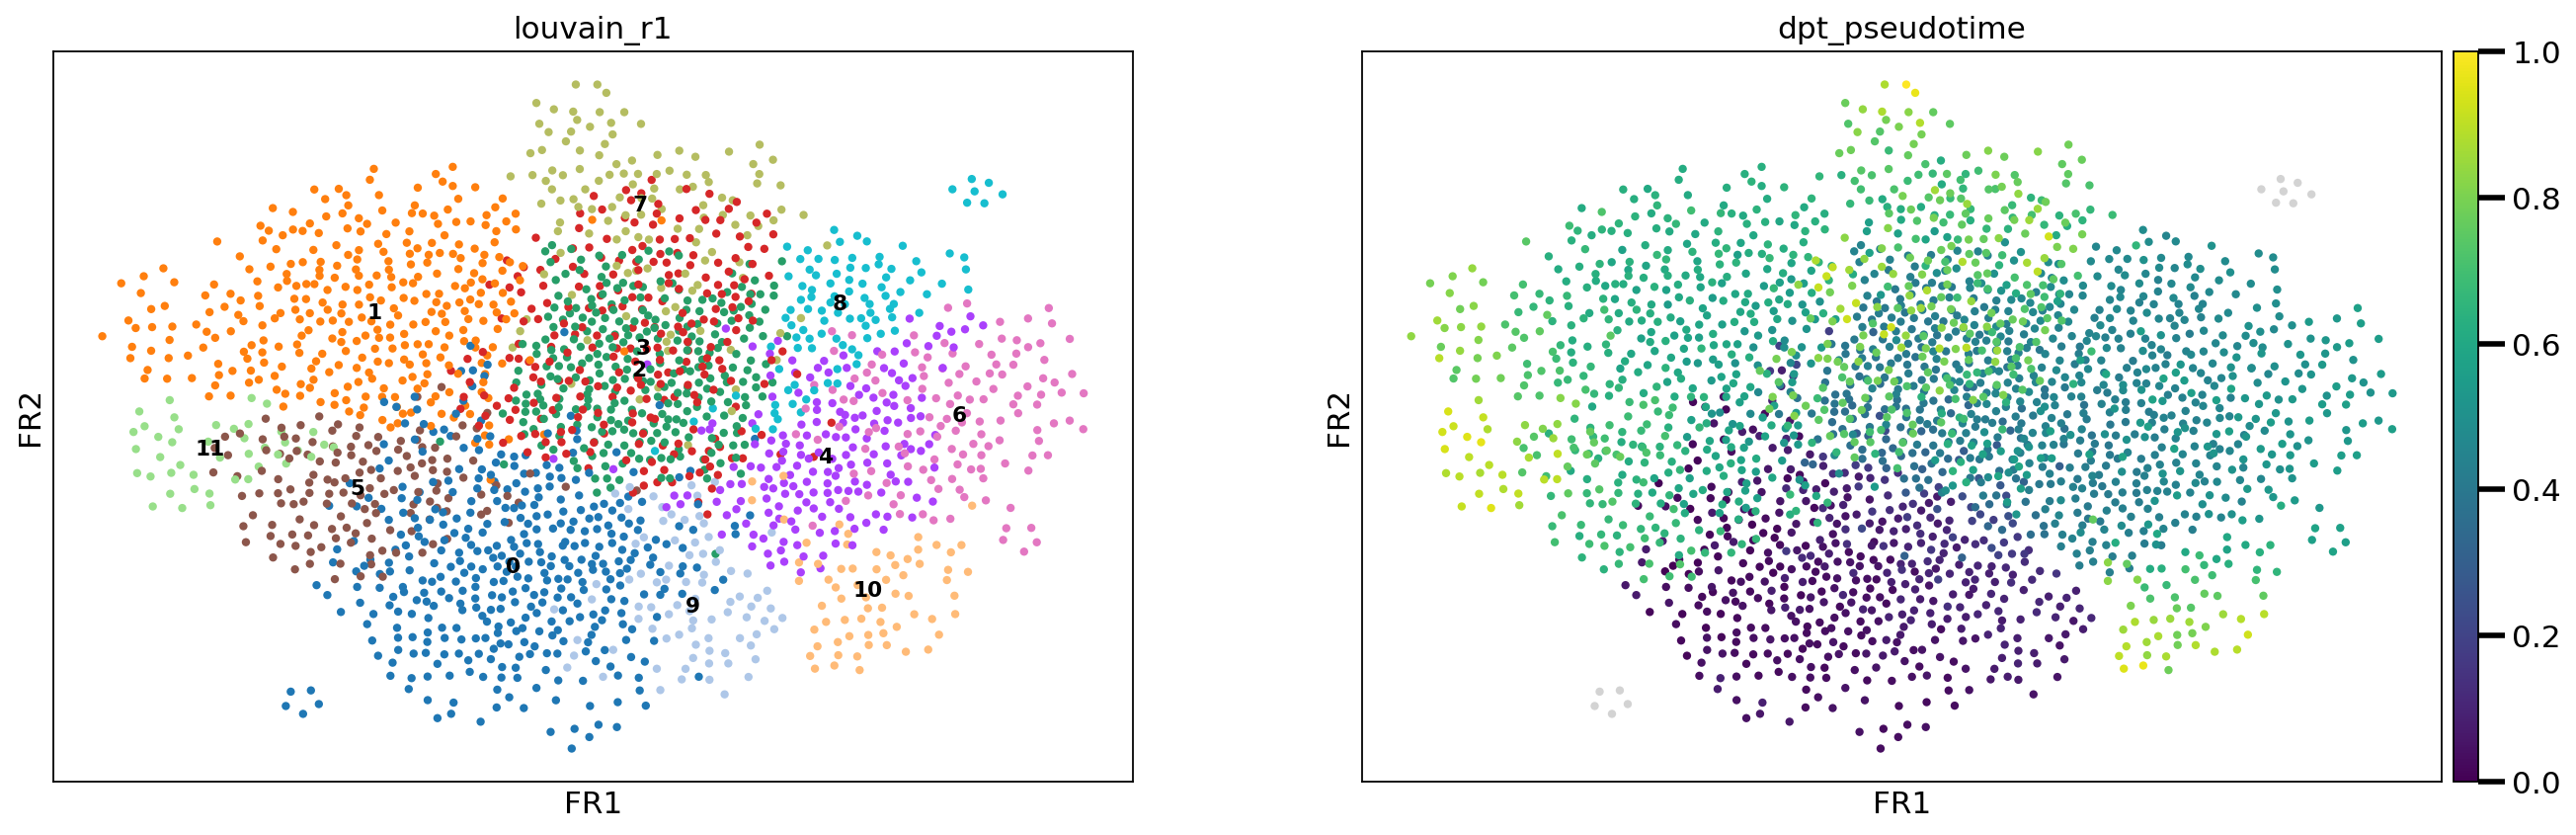

In [28]:
sc.pl.draw_graph(adata, color=[SELECTED_LOUVAIN, 'dpt_pseudotime'], legend_loc='on data', legend_fontsize= 'x-small')